In [111]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

<h1> Loading the dataset

In [169]:
df=pd.read_csv('powerplant database.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [6]:
df.shape

(907, 27)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [9]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

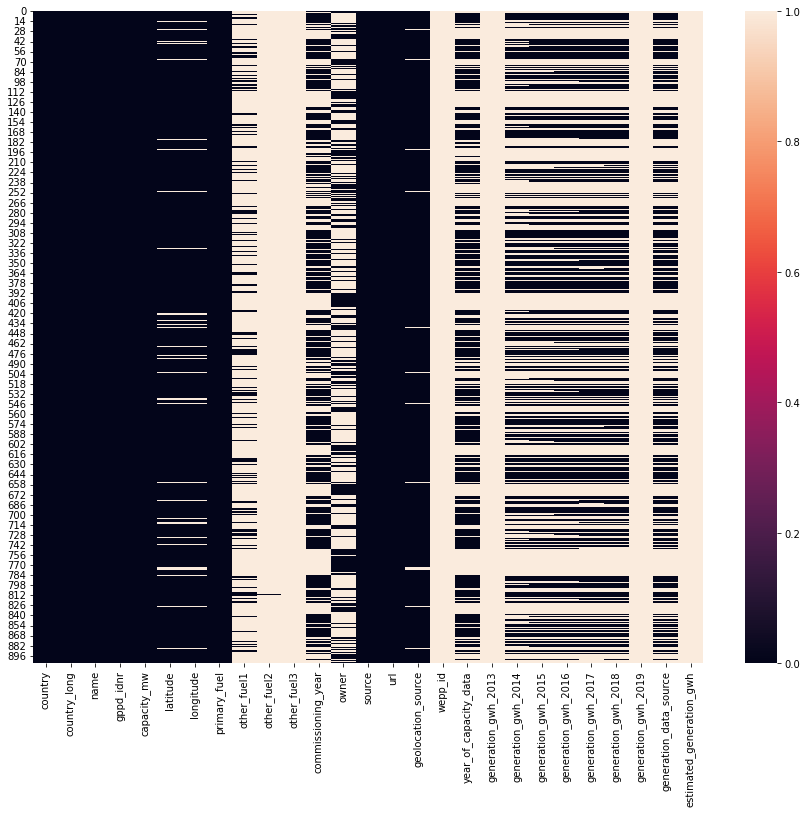

In [13]:
plt.figure(figsize=(15,12))
sns.heatmap(df.isnull())

In [170]:
df.drop(columns=['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

In [19]:
pd.set_option('display.max_columns',None)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


 1.There is very high variation and skewnwss in data of generation_gwh for all the years.<br>
 2.There is high skewness in capacity_mw.<br>
 3.There is only one data in year of capacity data i.e 2019, so it is better to drop it as it is not giving any insight about the data.

In [171]:
df.drop(columns=['year_of_capacity_data'],axis=1,inplace=True)

Dropping the year of capacity data from dataset

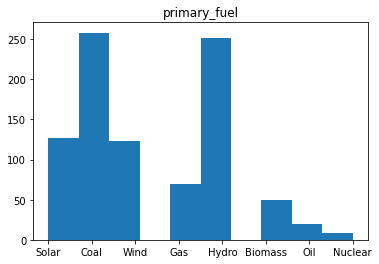

In [25]:
#histogram
df['primary_fuel'].hist(grid = False)
plt.title('primary_fuel')
plt.show()

The representation of the column primary fuel as it is one the target variable

There is class imbalance in this data

Very high skewness in the column capacity_mw

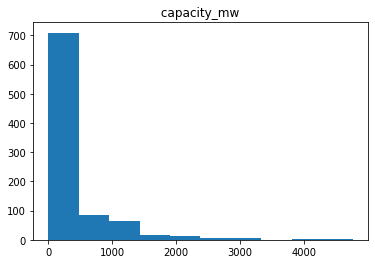

In [28]:
#histogram
df['capacity_mw'].hist(grid = False)
plt.title(' capacity_mw ')
plt.show()

The visual representation of the capacity_mw column, there is high skewness

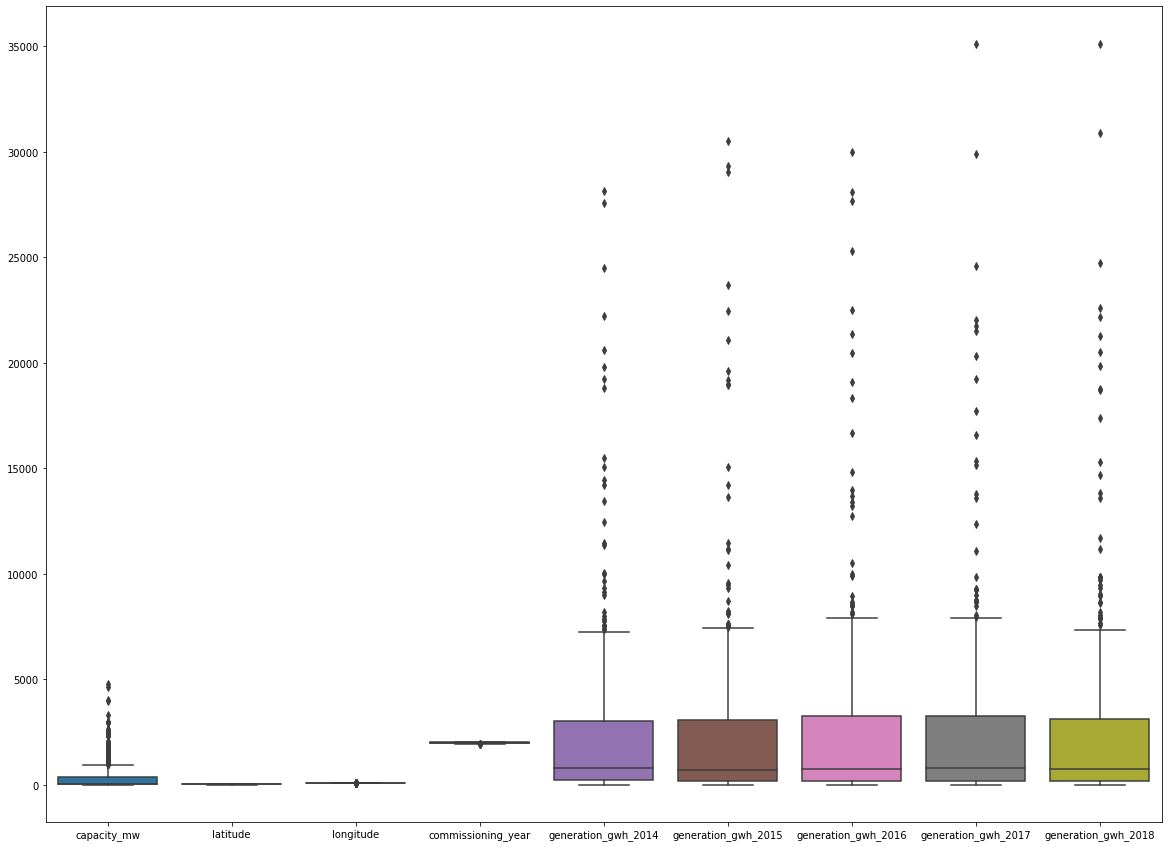

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(20,15))
sns.boxplot(data = df, ax=ax)
plt.show()

The boxplot shows that there are many outliers

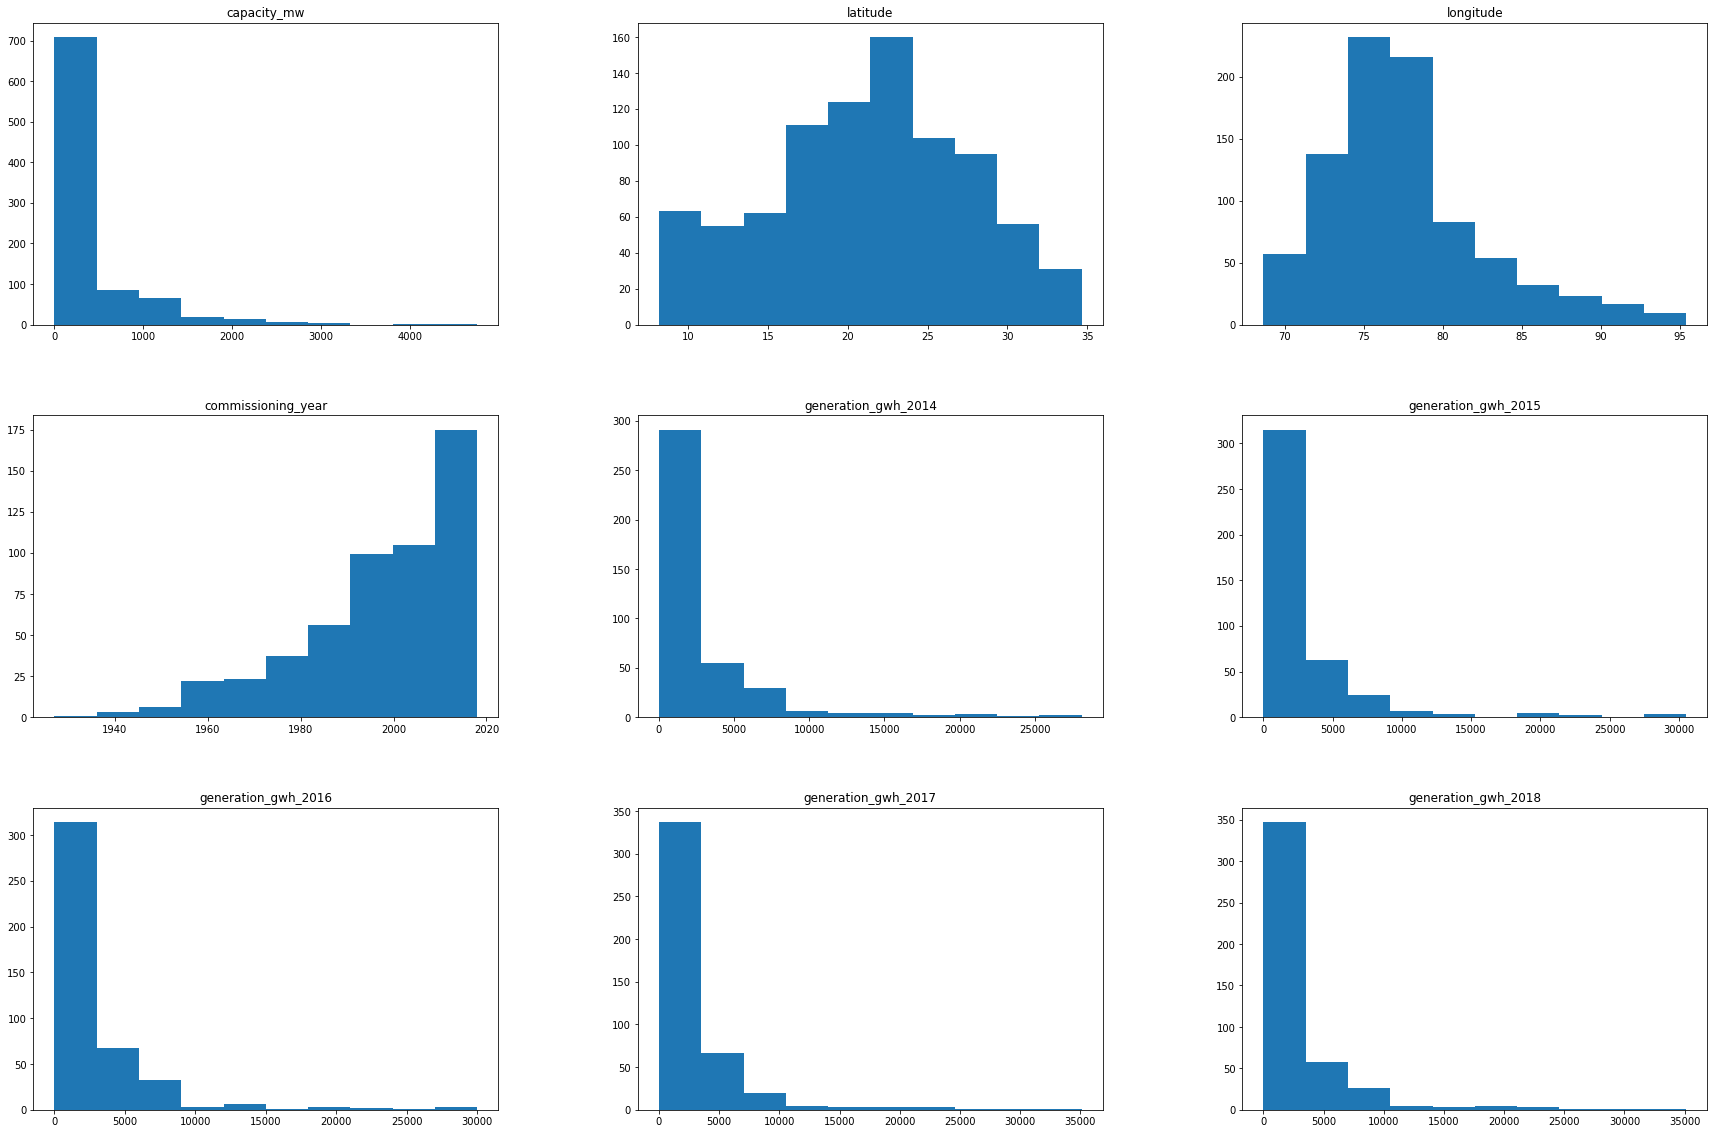

In [34]:
df.hist(figsize = (30,20), grid = False)
plt.show()

The data is now less skewed and more towards normal distribution.

<AxesSubplot:>

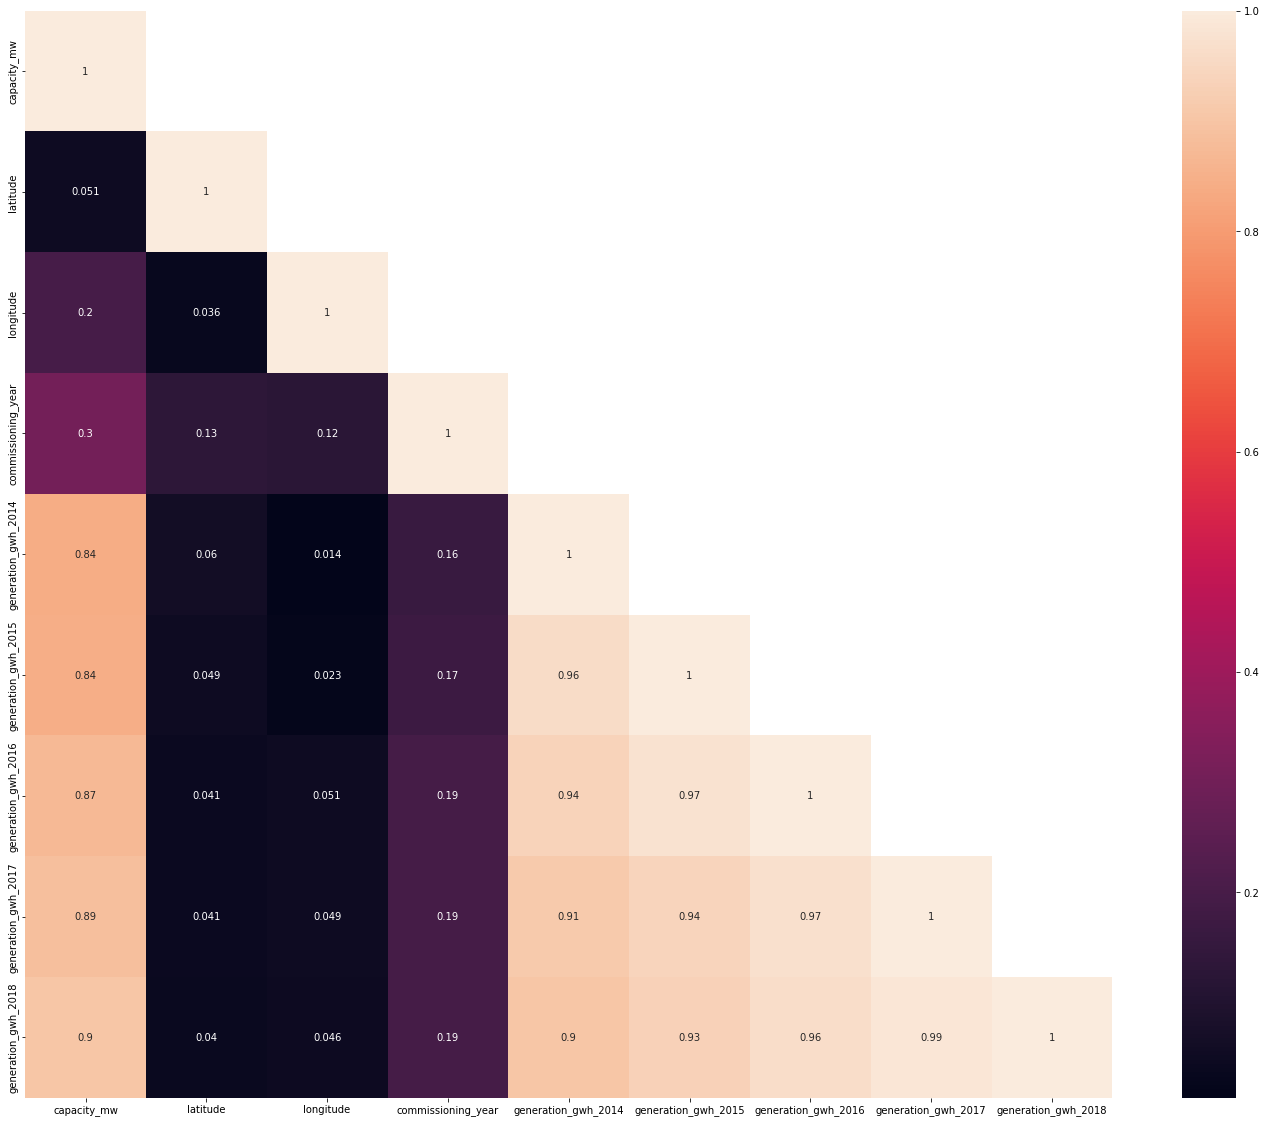

In [36]:
#Correlation Matrix

corr_mat = df.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(25,20)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

It appears that there is high multicollinearity between certain columns.

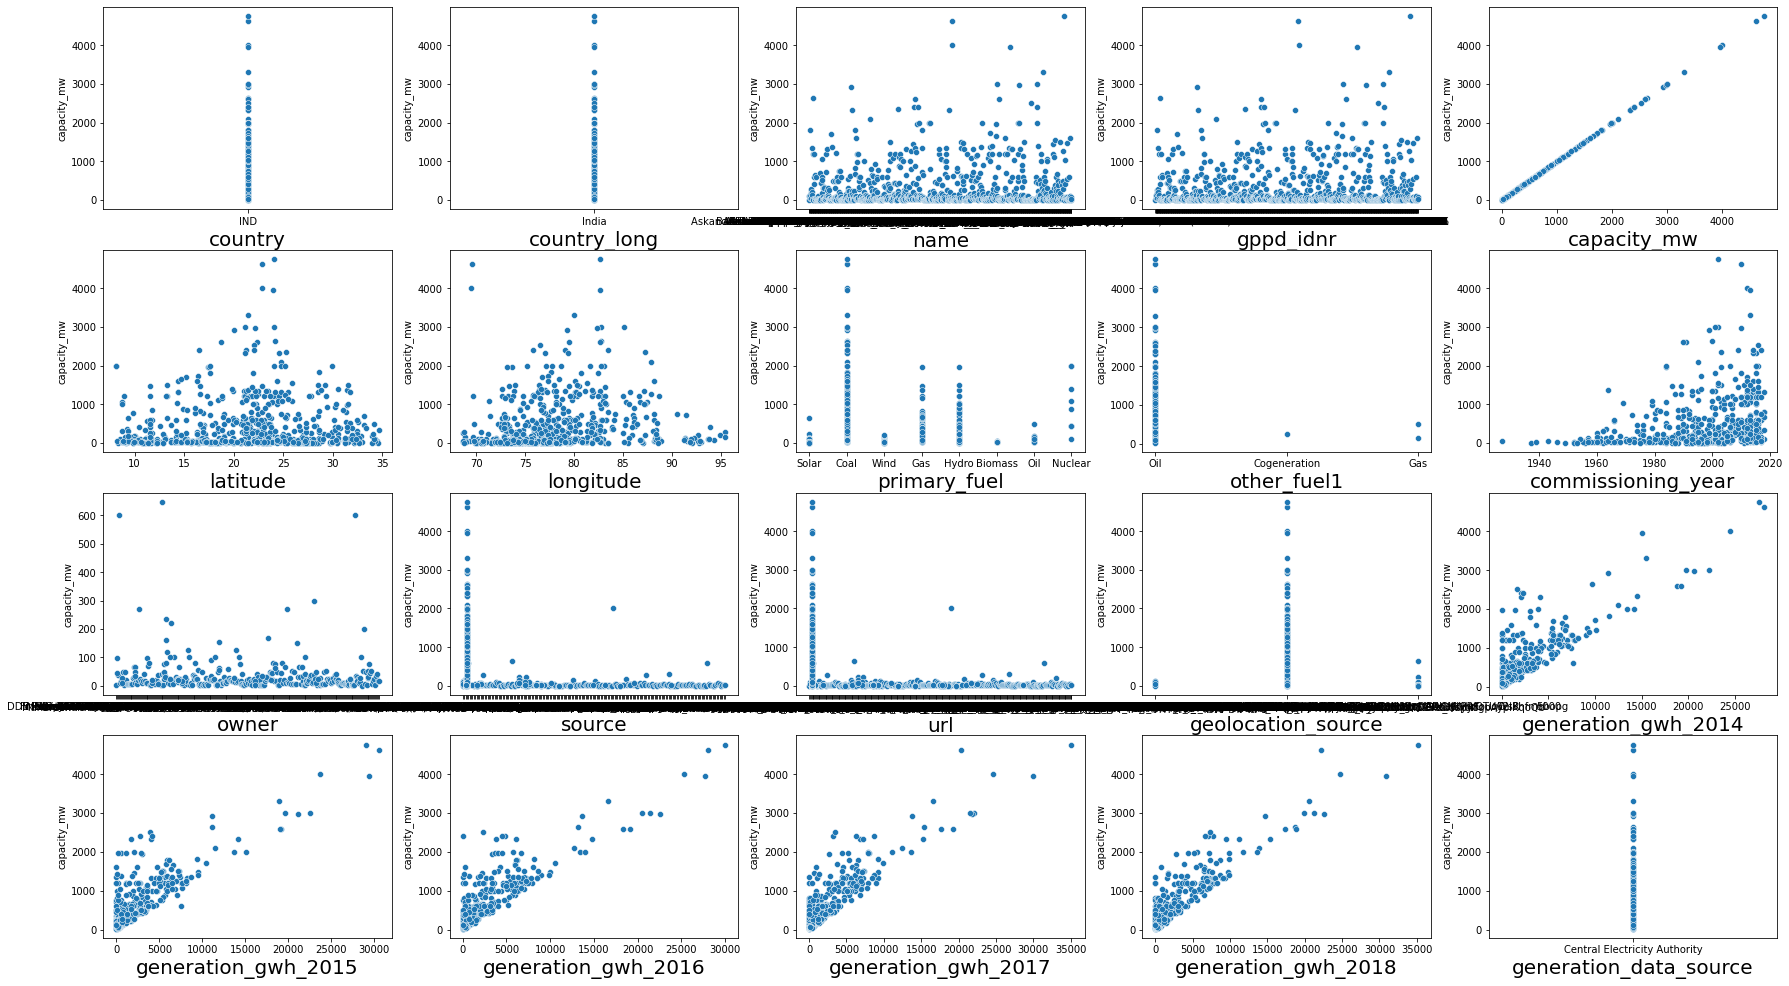

In [40]:
plt.figure(figsize = (30,35))
graph = 1

for column in df:
    if graph<=40:
        ax = plt.subplot(8,5,graph)
        sns.scatterplot(x = df[column], y = 'capacity_mw', data = df)
        plt.xlabel(column, fontsize = 20)
        graph+=1
plt.show()


Scatter plot shows that there does not exist relationship between capacity_mw and some variables. We will drop those variables

In [41]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

There is high skewness in some variables.

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

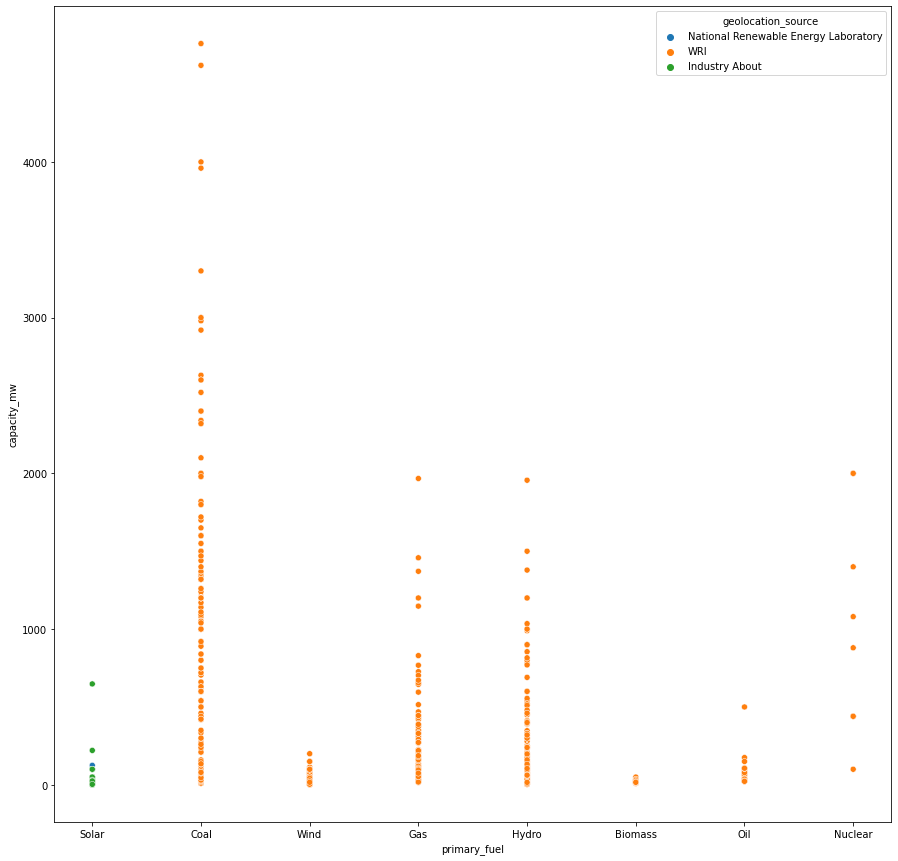

In [42]:
fig,axes=plt.subplots(1,1,figsize=(15,15))
sns.scatterplot(x='primary_fuel',y='capacity_mw',hue='geolocation_source',data=df)

The scatter plot shows the relationship between capacity_mw and primary_level

In [43]:
df['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

There is only a single entry in generation_data_source. It will not help in prediction, so it is better to drop it.

In [172]:
df.drop(columns = ['generation_data_source'], axis = 1, inplace = True)

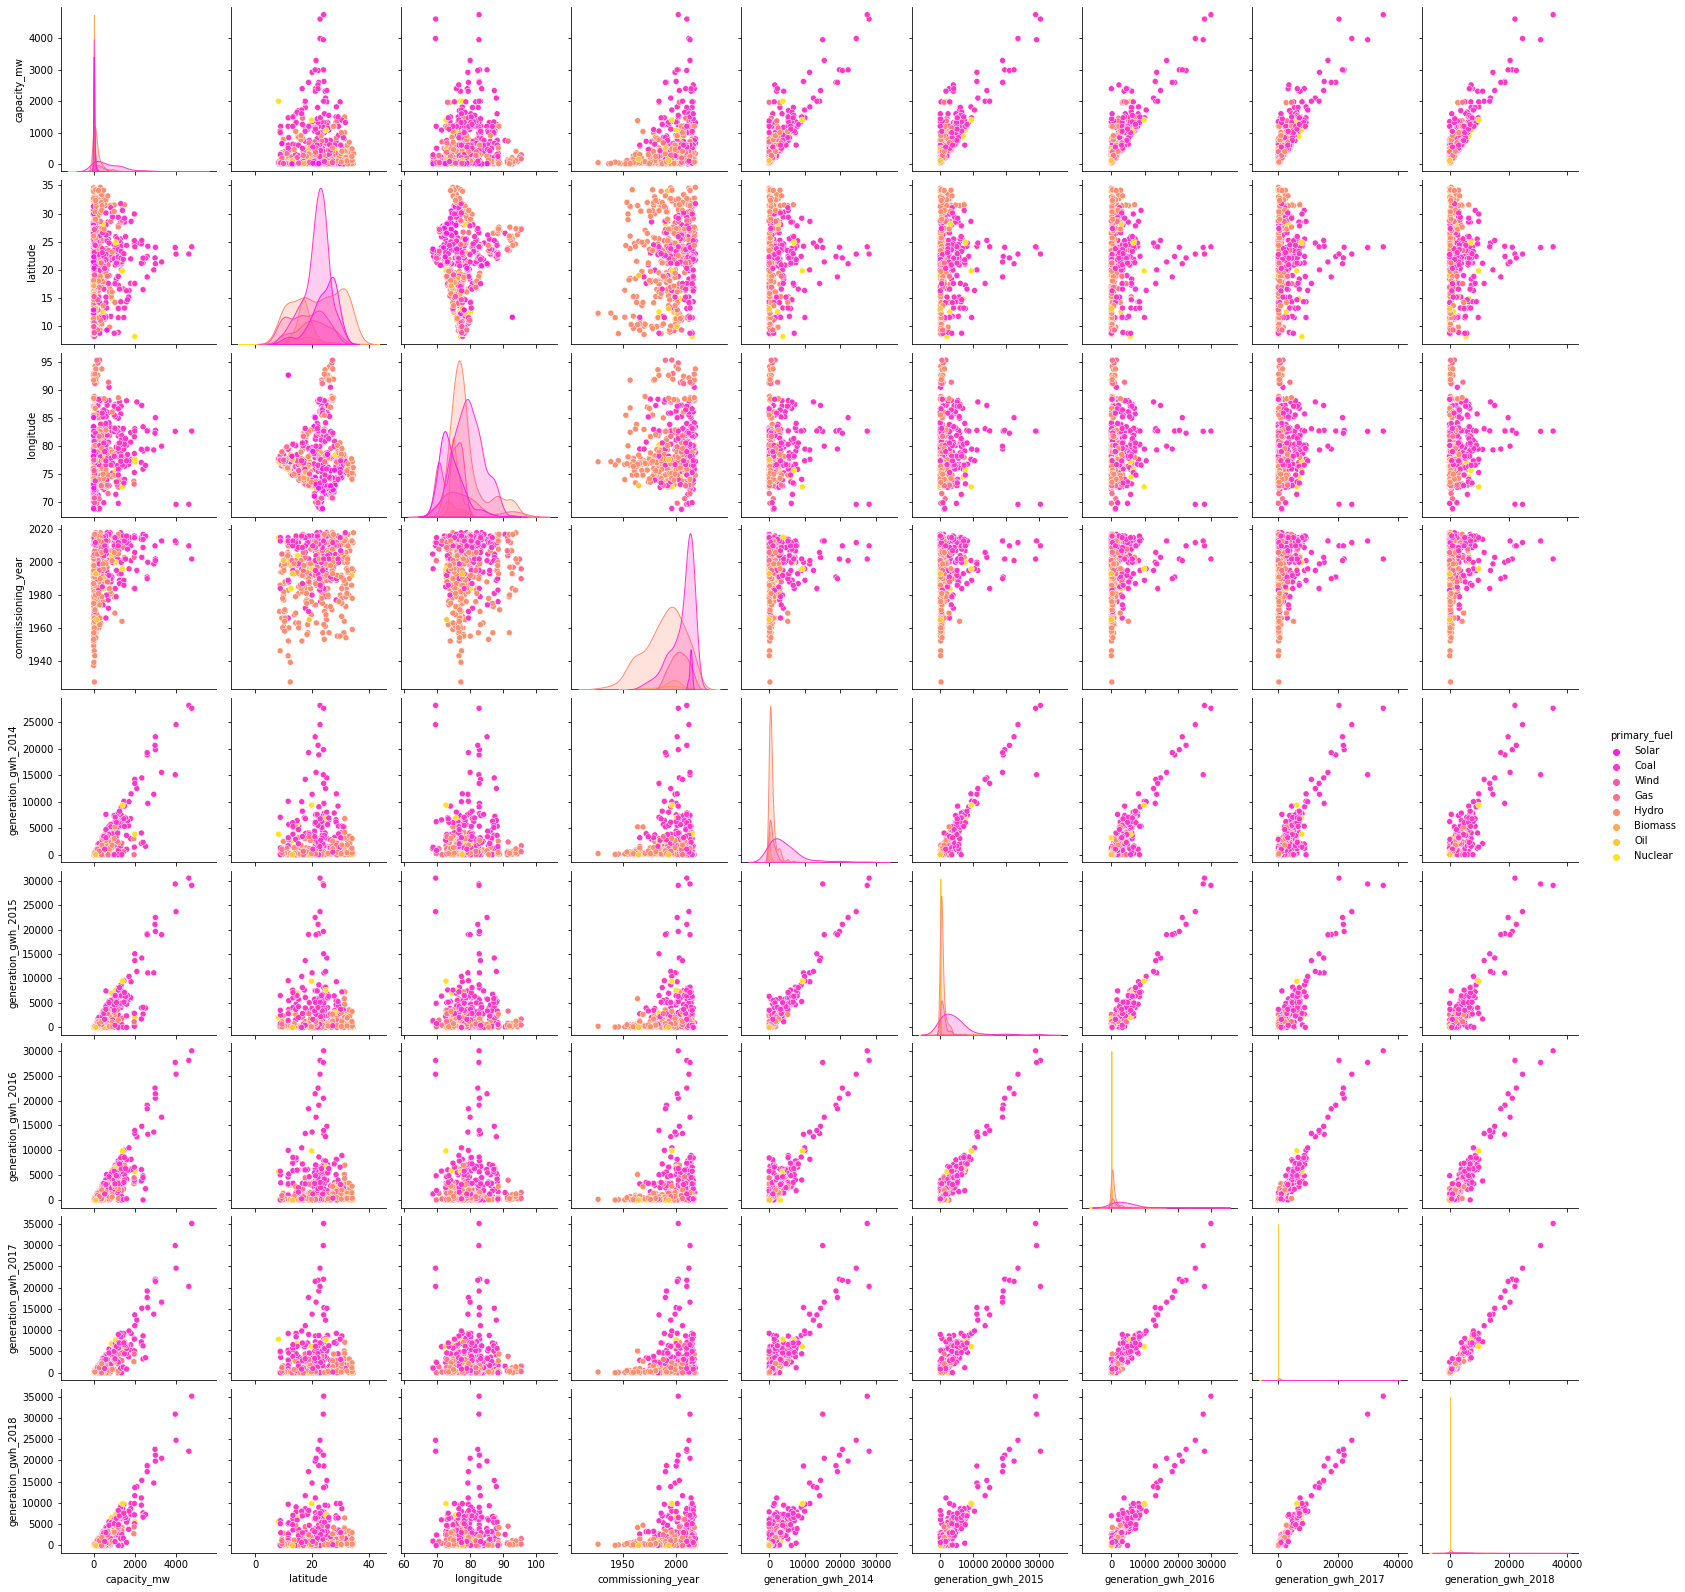

In [47]:
sns.pairplot(df, hue = 'primary_fuel',palette='spring')

Pairplot shows that coal is associated with the high capacity.

In [48]:
#Dealing with null values

from sklearn.impute import KNNImputer
knn_ipm = KNNImputer(n_neighbors = 3)
data_filled = knn_ipm.fit_transform(df[['latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']])

data1 = pd.DataFrame(data_filled)

In [50]:
data1.columns = ['latitude', 'longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
data1

,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,28.1839,73.2407,2011.000000,576.547333,482.349333,551.226333,529.008000,435.167033
1,24.7663,74.6090,1967.000000,2531.734217,298.881417,265.260367,241.997267,193.759667
2,21.9038,69.3732,2009.333333,2420.079333,1942.164800,2280.040517,1644.988333,830.246167
3,23.8712,91.3602,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128
4,21.9603,82.4091,2015.000000,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,2016.000000,71.736667,0.994875,233.596650,865.400000,686.500000
903,12.8932,78.1654,1977.666667,221.352445,125.761164,41.617533,887.822717,195.202417
904,15.2758,75.5811,1961.333333,96.796917,63.411350,37.395417,61.474417,86.621383
905,24.3500,73.7477,1991.333333,1143.319383,965.062900,828.058550,1281.792517,1226.355550


Rename the columns.

In [173]:
df['other_fuel1'] = df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])
df['owner'] = df['owner'].fillna(df['owner'].mode()[0])
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['commissioning_year'] = data1['commissioning_year']
df['generation_gwh_2014'] = data1['generation_gwh_2014']
df['generation_gwh_2015'] = data1['generation_gwh_2015']
df['generation_gwh_2016'] = data1['generation_gwh_2016']
df['generation_gwh_2017'] = data1['generation_gwh_2017']
df['generation_gwh_2018'] = data1['generation_gwh_2018']
df['latitude'] = data1['latitude']
df['longitude'] = data1['longitude']
df.isna().sum()

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
url                    0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Dealing with null values of the categorical columns

In [56]:
df['country'].value_counts()

IND    907
Name: country, dtype: int64

In [57]:
df['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [58]:
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

There are different names for each row, so it is better to drop it

In [60]:
df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

There are different gppd_idnr for each row, so it is better to drop it

In [174]:
df.drop(columns = ['gppd_idnr','name', 'country_long','country'], axis = 1, inplace = True)

In [64]:
#Treating the outliers

# findingout the quantile of data with continuous columns
col = df.drop(columns = ['primary_fuel','other_fuel1','owner','source','url','geolocation_source'])
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
data_new = col[~((col < (Q1 -  1.5*IQR)) |(col > (Q3 +  1.5*IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", col.shape)
print("shape after".ljust(20),":", data_new.shape)
print("Percentage Loss".ljust(20),":", (col.shape[0]-data_new.shape[0])/col.shape[0])

shape before and after
shape before         : (907, 9)
shape after          : (702, 9)
Percentage Loss      : 0.22601984564498345


We can't apply this method, as we are losing 22% data

In [65]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

Applies label encoder

In [175]:
a = lab_enc.fit_transform(df['primary_fuel'])
b = lab_enc.fit_transform(df['other_fuel1'])
c = lab_enc.fit_transform(df['owner'])
d = lab_enc.fit_transform(df['source'])
e = lab_enc.fit_transform(df['url'])
f = lab_enc.fit_transform(df['geolocation_source'])

Fitted the data

In [176]:
df['primary_fuel'] = a
df['other_fuel1'] = b
df['owner'] = c
df['source'] = d
df['url'] = e 
df['geolocation_source'] = f
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.000000,229,109,128,1,576.547333,482.349333,551.226333,529.008000,435.167033
1,98.0,24.7663,74.6090,1,2,1967.000000,258,174,173,2,2531.734217,298.881417,265.260367,241.997267,193.759667
2,39.2,21.9038,69.3732,7,2,2009.333333,2,21,205,2,2420.079333,1942.164800,2280.040517,1644.988333,830.246167
3,135.0,23.8712,91.3602,2,2,2004.000000,5,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.000000,5,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.000000,5,22,58,2,71.736667,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2,1977.666667,114,77,22,0,221.352445,125.761164,41.617533,887.822717,195.202417
904,25.5,15.2758,75.5811,7,2,1961.333333,5,21,260,2,96.796917,63.411350,37.395417,61.474417,86.621383
905,80.0,24.3500,73.7477,1,2,1991.333333,91,59,82,2,1143.319383,965.062900,828.058550,1281.792517,1226.355550


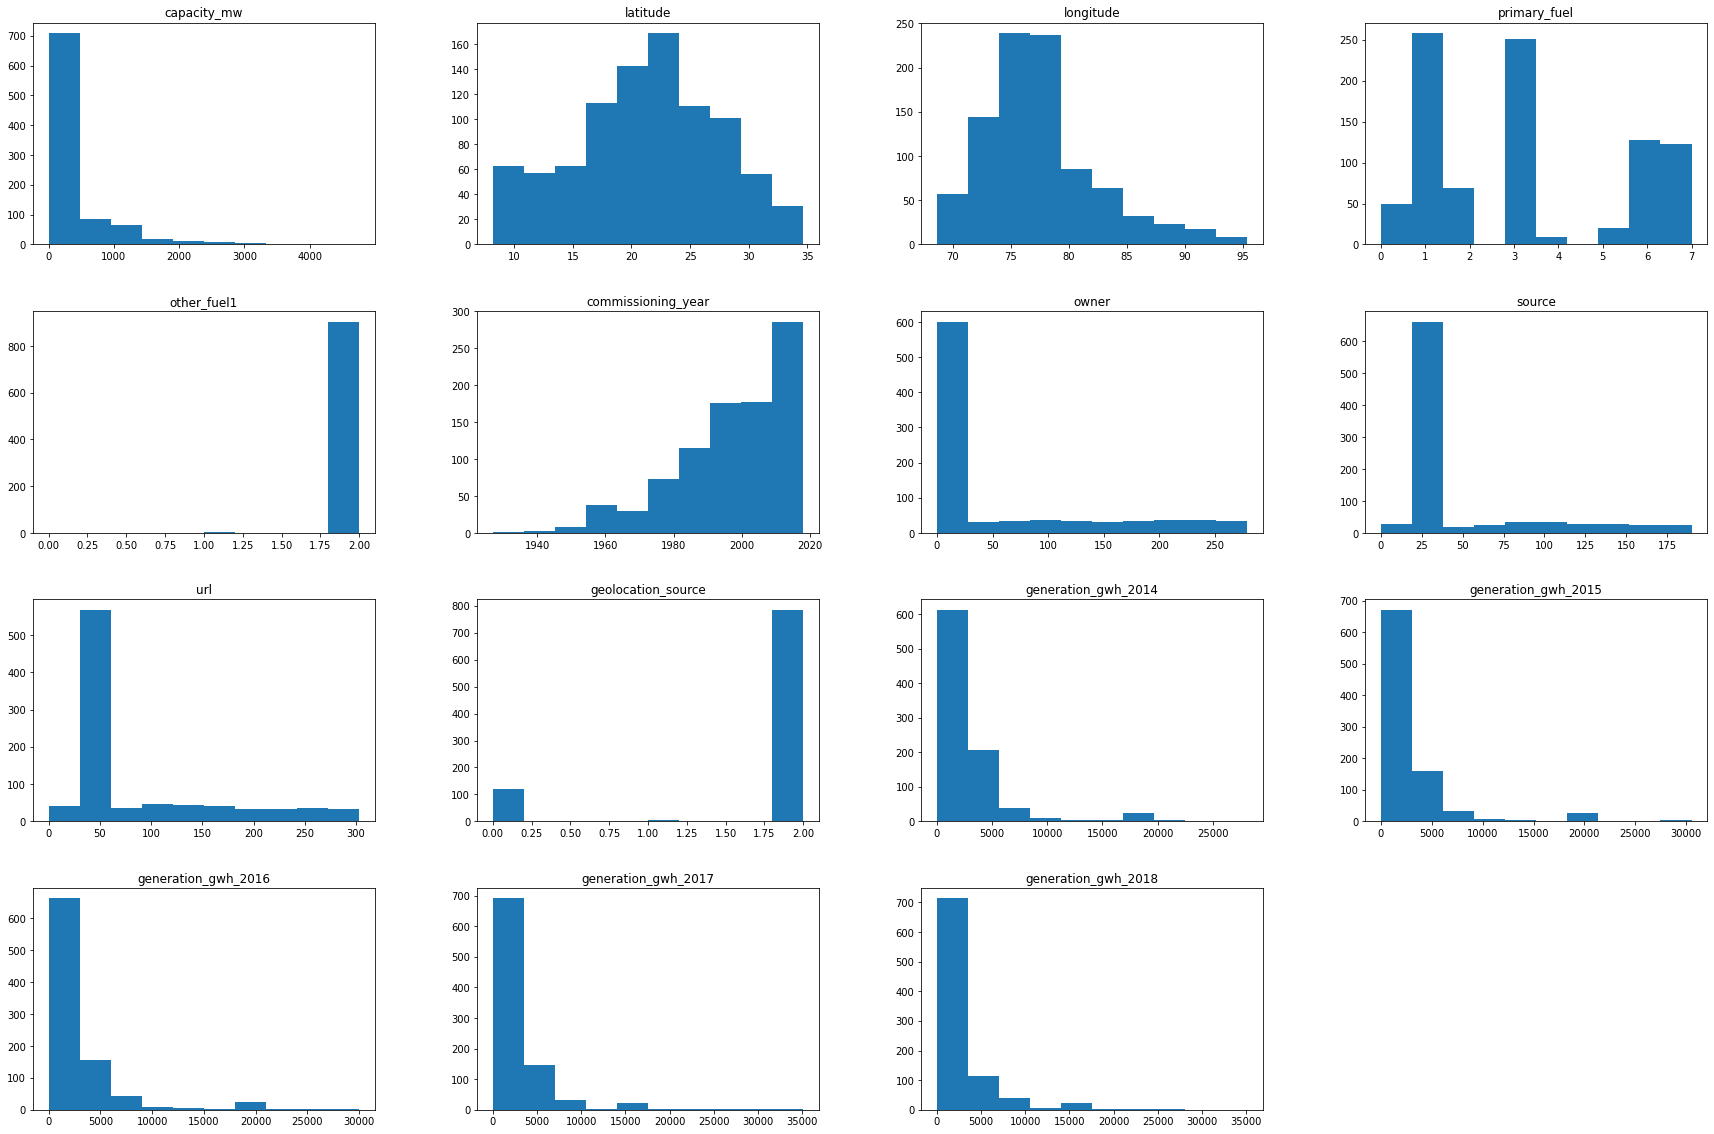

In [71]:
df.hist(figsize = (30,20), grid = False)
plt.show()

The data is now less skewed

<h2>Model with Target Variable: primary_fuel

In [72]:
y1 = df['primary_fuel']
x1 = df.drop(['primary_fuel'],axis = 1)

In [73]:
#Handling class imbalance problem by oversampling the minority classes.

from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_over, y_over = SM.fit_resample(x1,y1)

<AxesSubplot:title={'center':'quality'}, xlabel='primary_fuel'>

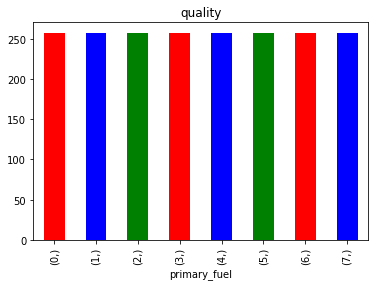

In [74]:
pd.DataFrame(y_over).value_counts().plot(kind='bar', title='quality', color=['r','b','g'])

In [75]:
ydata = pd.Series(y_over)
ydata.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

In [76]:
xdata = pd.DataFrame(X_over)
xdata.head()

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2,2011.000000,229,109,128,1,576.547333,482.349333,551.226333,529.008000,435.167033
1,98.0,24.7663,74.6090,2,1967.000000,258,174,173,2,2531.734217,298.881417,265.260367,241.997267,193.759667
2,39.2,21.9038,69.3732,2,2009.333333,2,21,205,2,2420.079333,1942.164800,2280.040517,1644.988333,830.246167
3,135.0,23.8712,91.3602,2,2004.000000,5,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,2,2015.000000,5,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [77]:
xdata.columns =['capacity_mw', 'latitude', 'longitude', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
        'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018']
xdata.head()

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2,2011.000000,229,109,128,1,576.547333,482.349333,551.226333,529.008000,435.167033
1,98.0,24.7663,74.6090,2,1967.000000,258,174,173,2,2531.734217,298.881417,265.260367,241.997267,193.759667
2,39.2,21.9038,69.3732,2,2009.333333,2,21,205,2,2420.079333,1942.164800,2280.040517,1644.988333,830.246167
3,135.0,23.8712,91.3602,2,2004.000000,5,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,2,2015.000000,5,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [78]:
xdata.skew()

capacity_mw            2.859776
latitude               0.029808
longitude              1.569347
other_fuel1           -6.209271
commissioning_year    -0.857223
owner                  1.019350
source                 1.377682
url                    1.341992
geolocation_source    -2.313691
generation_gwh_2014    3.321930
generation_gwh_2015    3.481680
generation_gwh_2016    3.352046
generation_gwh_2017    3.127869
generation_gwh_2018    3.136225
dtype: float64

The skewness is very high.


In [79]:
xdata.drop(columns = ['other_fuel1'], axis = 1, inplace = True)

In [89]:
#Applying z score
from scipy.stats import zscore

z = np.abs(zscore(xdata))

data= xdata[(z<3).all(axis = 1)]

In [91]:
print("shape before and after")
print("shape before".ljust(20),":", xdata.shape)
print("shape after".ljust(20),":", data.shape)
print("Percentage Loss".ljust(20),":", (xdata.shape[0]-data.shape[0])/xdata.shape[0])

shape before and after
shape before         : (2064, 13)
shape after          : (1902, 13)
Percentage Loss      : 0.07848837209302326


We are losing only 7% data which is acceptable

In [148]:
d =  []
s = range(0,2062)
index = data.index

for i in s:
    if i in index:
        continue
    else:
        d.append(i)

Created a list of deleted rows

In [150]:
target = ydata.drop(index = d)
t = pd.Series(data = target, index = range(0,2065))
ta =t.dropna(axis = 0)
ta.head()

0    6.0
1    1.0
2    7.0
4    1.0
5    1.0
Name: primary_fuel, dtype: float64

Deleted the rows depending on the deleted x data

In [94]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
#applying standard scaler:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)

In [97]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = data.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,capacity_mw,1.968361
1,latitude,1.246051
2,longitude,1.187915
3,commissioning_year,1.224894
4,owner,3.991821
5,source,3.392583
6,url,1.419554
7,geolocation_source,1.464756
8,generation_gwh_2014,12.024005
9,generation_gwh_2015,23.078474


VIF is greater than 10 for some features

In [104]:
data.drop(['generation_gwh_2016'], axis =1, inplace = True)

Dropped the feature with highest VIF

In [105]:
#again applying standard scaler:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)

In [106]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = data.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,capacity_mw,1.949345
1,latitude,1.241883
2,longitude,1.187114
3,commissioning_year,1.224398
4,owner,3.988396
5,source,3.391340
6,url,1.402923
7,geolocation_source,1.463830
8,generation_gwh_2014,11.724195
9,generation_gwh_2015,14.818715


VIF is still greater than 10 for some features

In [107]:
data.drop(['generation_gwh_2017'], axis =1, inplace = True)

In [108]:
#again applying standard scaler:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)

In [109]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = data.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,capacity_mw,1.850385
1,latitude,1.241561
2,longitude,1.185566
3,commissioning_year,1.221579
4,owner,3.985425
5,source,3.390740
6,url,1.380370
7,geolocation_source,1.430223
8,generation_gwh_2014,11.715196
9,generation_gwh_2015,14.145753


In [152]:
X_train, X_test, y_train, y_test = train_test_split(
    data, ta, test_size=0.2, random_state=62)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier']

acc = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc.append(accuracy_score(pred, y_test))

models = {'Modelling Algorithm': model_names, 'Accuracy': acc}
models_df = pd.DataFrame(models)
models_df

,Modelling Algorithm,Accuracy
0,KNearestNeighbors,0.737533
1,RandomForestClassifier,0.881890
2,DecisionTree,0.837270
3,GradientBoostingClassifier,0.889764


Trained the data

<AxesSubplot:xlabel='Accuracy', ylabel='Modelling Algorithm'>

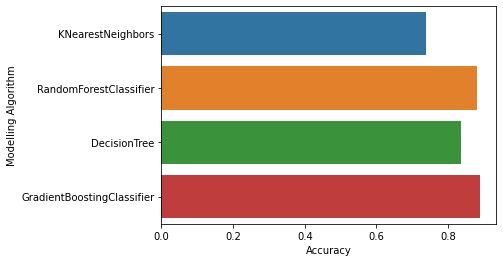

In [153]:
sns.barplot(y='Modelling Algorithm', x='Accuracy', data=models_df)

Visual representation of accuracy scores of different models

In [156]:
#Now, let's apply cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    data, ta, test_size=0.2, random_state=62)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, data, ta, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,Modelling Algorithm,CV SCORE
0,KNearestNeighbors,0.727127
1,RandomForestClassifier,0.926397
2,DecisionTree,0.876457
3,GradientBoostingClassifier,0.901698


Applied cross validation.


In [157]:
#Comparing CV Score and the Accuracy score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['ACCURACY'] = acc
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [acc[0] - CV_S[0], acc[1] - CV_S[1], acc[2] - CV_S[2], acc[3] - CV_S[3]]
Comparison

,Modelling Algorithm,ACCURACY,CV SCORE,Difference
0,KNearestNeighbors,0.737533,0.727127,0.010406
1,RandomForestClassifier,0.881890,0.926397,-0.044508
2,DecisionTree,0.837270,0.876457,-0.039186
3,GradientBoostingClassifier,0.889764,0.901698,-0.011934


The least difference is in KNearestNeighbors.

In [158]:
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
dtc = DecisionTreeClassifier()
gb = GradientBoostingClassifier()

Initiated the models



In [159]:
#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.7375328083989501
Classification report:
               precision    recall  f1-score   support

         0.0       0.77      0.78      0.77        55
         1.0       0.74      0.54      0.62        52
         2.0       0.66      0.65      0.65        51
         3.0       0.56      0.59      0.57        41
         4.0       0.76      0.79      0.78        48
         5.0       0.75      0.87      0.81        46
         6.0       0.67      0.79      0.73        39
         7.0       0.98      0.90      0.94        49

    accuracy                           0.74       381
   macro avg       0.74      0.74      0.73       381
weighted avg       0.74      0.74      0.74       381



In [160]:
#Train the model using the training sets
rf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.89501312335958
Classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        55
         1.0       0.90      0.67      0.77        52
         2.0       0.83      0.88      0.86        51
         3.0       0.76      0.90      0.82        41
         4.0       0.87      0.98      0.92        48
         5.0       0.88      0.80      0.84        46
         6.0       1.00      1.00      1.00        39
         7.0       1.00      1.00      1.00        49

    accuracy                           0.90       381
   macro avg       0.90      0.90      0.89       381
weighted avg       0.90      0.90      0.89       381



In [161]:
#Train the model using the training sets
dtc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.84251968503937
Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.91      0.94        55
         1.0       0.67      0.60      0.63        52
         2.0       0.75      0.75      0.75        51
         3.0       0.69      0.80      0.74        41
         4.0       0.88      0.92      0.90        48
         5.0       0.79      0.80      0.80        46
         6.0       1.00      1.00      1.00        39
         7.0       1.00      1.00      1.00        49

    accuracy                           0.84       381
   macro avg       0.84      0.85      0.84       381
weighted avg       0.84      0.84      0.84       381



In [162]:
#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.889763779527559
Classification report:
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.96        55
         1.0       0.89      0.62      0.73        52
         2.0       0.83      0.84      0.83        51
         3.0       0.78      0.85      0.81        41
         4.0       0.83      1.00      0.91        48
         5.0       0.89      0.85      0.87        46
         6.0       1.00      1.00      1.00        39
         7.0       1.00      1.00      1.00        49

    accuracy                           0.89       381
   macro avg       0.89      0.89      0.89       381
weighted avg       0.89      0.89      0.89       381



In [163]:
#HYPERPARAMETER TUNING:

grid_param = {
    'n_neighbors' : range(2,8,2),
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : range(20,40,5)
}

Applied parameter tuning.

In [164]:
grid = GridSearchCV(knn, param_grid = grid_param)

In [165]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(20, 40, 5),
                         'n_neighbors': range(2, 8, 2),
                         'weights': ['uniform', 'distance']})

Trained the model



In [166]:
best_parameters = grid.best_params_
print(best_parameters)

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 2, 'weights': 'distance'}


In [167]:
#FINAL MODEL
#Substituting the best parameters in the KNeighborsClassifier:

KNN = KNeighborsClassifier(algorithm = 'auto', leaf_size = 20, n_neighbors = 2, weights = 'distance')

KNN.fit(X_train, y_train)
KNN.score(X_test,y_test)

0.7847769028871391

The Final Score is 78.47%

In [168]:
#SAVING THE MODEL:

import joblib
joblib.dump(KNN, 'Power_plant_classifier.pkl')


['Power_plant_classifier.pkl']

<h2>Model with Target Variable: capacity_mw

In [177]:
y2 = df['capacity_mw']
x2 = df.drop(['capacity_mw'],axis = 1)

In [182]:
#Model Building

x_train, x_test, Y_train, Y_test = train_test_split(x2, y2, test_size = 0.3, random_state =42)

models = [LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(n_neighbors = 5), GradientBoostingRegressor()]

model_names = ['LR', 'RF', 'KNN', 'GB']

r2 = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train, Y_train)
    pred = clf.predict(x_test)
    r2.append(r2_score(Y_test,pred))

models = {'Modelling Algoritm' : model_names, 'r2 score' : r2}

models_df = pd.DataFrame(models)
models_df


,Modelling Algoritm,r2 score
0,LR,0.573110
1,RF,0.841358
2,KNN,0.577003
3,GB,0.808620


In [183]:
#Comparing CV Score and the r2 score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['r2 score'] = r2
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [r2[0] - CV_S[0], r2[1] - CV_S[1], r2[2] - CV_S[2], r2[3] - CV_S[3]]
Comparison


,Modelling Algorithm,r2 score,CV SCORE,Difference
0,LR,0.573110,0.727127,-0.154016
1,RF,0.841358,0.926397,-0.085039
2,KNN,0.577003,0.876457,-0.299454
3,GB,0.808620,0.901698,-0.093078


The difference is least in random forest regressor

In [184]:
#HYPERPARAMETER TUNING

from sklearn.model_selection import GridSearchCV

grid_param = {
    'n_estimators' : [100,130,160],
    'criterion' : ('mse', 'mae'),
    'max_depth' : [2,4,6,8],
    'min_samples_split' : range(1,5)
}

In [185]:
grid = GridSearchCV(RandomForestRegressor(), param_grid = grid_param)

In [186]:
grid.fit(x_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'), 'max_depth': [2, 4, 6, 8],
                         'min_samples_split': range(1, 5),
                         'n_estimators': [100, 130, 160]})

In [187]:
best_parameters = grid.best_params_
print(best_parameters)

{'criterion': 'mae', 'max_depth': 8, 'min_samples_split': 3, 'n_estimators': 160}


In [188]:
#FINAL MODEL
#Substituting the best parameters in the RandomForestRegressor:

rf =  RandomForestRegressor(criterion = 'mae', max_depth = 8, min_samples_split = 2, n_estimators = 160)

rf.fit(x_train, Y_train)
pred = rf.predict(x_test)
rscore = r2_score(Y_test, pred)
rscore

0.8294570449078611

Received the r2 score as 82.94%.

In [189]:
#SAVING THE MODEL:

import joblib
joblib.dump(rf, 'power_plant_regression.pkl')

['power_plant_regression.pkl']